# AUC Analysis

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
warnings.filterwarnings('ignore')

## Import Data

In [28]:
binary_file = 'AUCs_three.csv'
binary_df = pd.read_csv(binary_file)
print('Dataframe shape:')
display(binary_df.shape)
binary_df.head()

Dataframe shape:


(50, 7)

,CART,KNN,NB,LDA,RSM,ADA,RF
0,0.534286,0.545769,0.595963,0.608178,0.627049,0.641206,0.644485
1,0.844454,0.895757,0.720012,0.909843,0.910740,0.910149,0.910741
2,0.840118,0.886277,0.663761,0.903113,0.903266,0.902822,0.903565
3,0.678215,0.717930,0.417107,0.783071,0.543936,0.788344,0.787868
4,0.795963,0.847684,0.742570,0.875507,0.876576,0.875513,0.874909


In [29]:
binary_df.describe()

,CART,KNN,NB,LDA,RSM,ADA,RF
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.655453,0.680867,0.599824,0.721354,0.651716,0.738533,0.740741
std,0.133370,0.145491,0.101141,0.136455,0.198456,0.122416,0.121371
min,0.475319,0.466645,0.406551,0.472007,0.287000,0.534611,0.537017
25%,0.552937,0.576616,0.511804,0.617851,0.505680,0.650155,0.653788
50%,0.631184,0.651274,0.597958,0.717435,0.678889,0.729272,0.734042
75%,0.729696,0.775190,0.669761,0.821806,0.797658,0.823598,0.823608
max,0.974376,0.982617,0.846275,0.983338,0.983338,0.983193,0.983338


Text(0, 0.5, 'AUC Score')

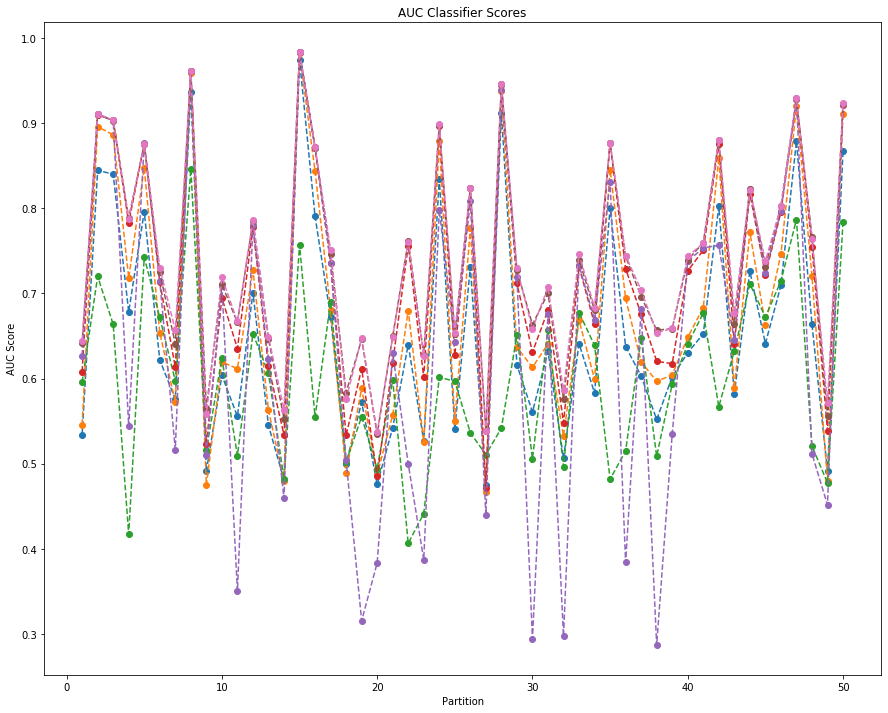

In [31]:
plt.figure(figsize = (15,12))
cart_binary = binary_df['CART']
plt.plot(range(1, 51), cart_binary, marker = 'o', linestyle = '--')
knn_binary = binary_df['KNN']
plt.plot(range(1, 51), knn_binary, marker = 'o', linestyle = '--')
nb_binary = binary_df['NB']
plt.plot(range(1, 51), nb_binary, marker = 'o', linestyle = '--')
lda_binary = binary_df['LDA']
plt.plot(range(1, 51), lda_binary, marker = 'o', linestyle = '--')
rsm_binary = binary_df['RSM']
plt.plot(range(1, 51), rsm_binary, marker = 'o', linestyle = '--')
lr_binary = binary_df['ADA']
plt.plot(range(1, 51), lr_binary, marker = 'o', linestyle = '--')
rf_binary = binary_df['RF']
plt.plot(range(1, 51), rf_binary, marker = 'o', linestyle = '--')

plt.title('AUC Classifier Scores')
plt.xlabel('Partition')
plt.ylabel('AUC Score')

## Partitions which perform consistently good

In [32]:
binary_df['Average'] = binary_df.mean(numeric_only=True, axis=1)
binary_df['Median'] = binary_df.median(numeric_only=True, axis=1)
print('Dataframe shape:')
display(binary_df.shape)
binary_df.head()

Dataframe shape:


(50, 9)

,CART,KNN,NB,LDA,RSM,ADA,RF,Average,Median
0,0.534286,0.545769,0.595963,0.608178,0.627049,0.641206,0.644485,0.599562,0.603870
1,0.844454,0.895757,0.720012,0.909843,0.910740,0.910149,0.910741,0.871671,0.902800
2,0.840118,0.886277,0.663761,0.903113,0.903266,0.902822,0.903565,0.857560,0.894549
3,0.678215,0.717930,0.417107,0.783071,0.543936,0.788344,0.787868,0.673781,0.698072
4,0.795963,0.847684,0.742570,0.875507,0.876576,0.875513,0.874909,0.841246,0.861297


In [33]:
binary_df['Average'].describe()

count    50.000000
mean      0.684070
std       0.127830
min       0.485308
25%       0.597069
50%       0.671147
75%       0.780289
max       0.949622
Name: Average, dtype: float64

In [34]:
is_best_quartile_avg = binary_df['Average']>0.6846
binary_best_age = binary_df[is_best_quartile_avg]
print('Dataframe shape:')
display(binary_best_age.shape)
binary_best_age.head(13)

Dataframe shape:


(22, 9)

,CART,KNN,NB,LDA,RSM,ADA,RF,Average,Median
1,0.844454,0.895757,0.720012,0.909843,0.910740,0.910149,0.910741,0.871671,0.902800
2,0.840118,0.886277,0.663761,0.903113,0.903266,0.902822,0.903565,0.857560,0.894549
4,0.795963,0.847684,0.742570,0.875507,0.876576,0.875513,0.874909,0.841246,0.861297
5,0.621923,0.653956,0.671762,0.713131,0.714473,0.724577,0.730196,0.690003,0.701567
7,0.936984,0.958832,0.846275,0.961165,0.961748,0.961457,0.961748,0.941173,0.959999
11,0.700884,0.727452,0.652772,0.777808,0.780068,0.784704,0.786630,0.744331,0.761069
14,0.974376,0.982617,0.757155,0.983338,0.983338,0.983193,0.983338,0.949622,0.982905
15,0.790595,0.843527,0.554724,0.872012,0.870647,0.870954,0.871870,0.810618,0.857087
16,0.672790,0.681085,0.690348,0.735703,0.736048,0.746846,0.751074,0.716271,0.725987
23,0.834240,0.879446,0.601375,0.896500,0.797849,0.897847,0.898603,0.829409,0.856843


In [35]:
binary_df['Median'].describe()

count    50.000000
mean      0.699363
std       0.138661
min       0.483459
25%       0.598610
50%       0.688902
75%       0.798815
max       0.982905
Name: Median, dtype: float64

In [36]:
is_best_quartile_median = binary_df['Median']>0.6545
binary_best_median = binary_df[is_best_quartile_median]
print('Dataframe shape:')
display(binary_best_median.shape)
binary_best_median.head(13)

Dataframe shape:


(31, 9)

,CART,KNN,NB,LDA,RSM,ADA,RF,Average,Median
1,0.844454,0.895757,0.720012,0.909843,0.910740,0.910149,0.910741,0.871671,0.902800
2,0.840118,0.886277,0.663761,0.903113,0.903266,0.902822,0.903565,0.857560,0.894549
3,0.678215,0.717930,0.417107,0.783071,0.543936,0.788344,0.787868,0.673781,0.698072
4,0.795963,0.847684,0.742570,0.875507,0.876576,0.875513,0.874909,0.841246,0.861297
5,0.621923,0.653956,0.671762,0.713131,0.714473,0.724577,0.730196,0.690003,0.701567
7,0.936984,0.958832,0.846275,0.961165,0.961748,0.961457,0.961748,0.941173,0.959999
9,0.603790,0.619502,0.624250,0.694757,0.709156,0.710502,0.719107,0.668723,0.681740
11,0.700884,0.727452,0.652772,0.777808,0.780068,0.784704,0.786630,0.744331,0.761069
14,0.974376,0.982617,0.757155,0.983338,0.983338,0.983193,0.983338,0.949622,0.982905
15,0.790595,0.843527,0.554724,0.872012,0.870647,0.870954,0.871870,0.810618,0.857087


In [37]:
binary_df.nlargest(3, 'Average')

,CART,KNN,NB,LDA,RSM,ADA,RF,Average,Median
14,0.974376,0.982617,0.757155,0.983338,0.983338,0.983193,0.983338,0.949622,0.982905
7,0.936984,0.958832,0.846275,0.961165,0.961748,0.961457,0.961748,0.941173,0.959999
46,0.878860,0.919984,0.786721,0.928431,0.929467,0.927987,0.929615,0.900152,0.923985


In [38]:
binary_df.nlargest(3, 'Median')

,CART,KNN,NB,LDA,RSM,ADA,RF,Average,Median
14,0.974376,0.982617,0.757155,0.983338,0.983338,0.983193,0.983338,0.949622,0.982905
7,0.936984,0.958832,0.846275,0.961165,0.961748,0.961457,0.961748,0.941173,0.959999
27,0.912226,0.937861,0.541875,0.945660,0.938893,0.945220,0.945806,0.881077,0.938377


## Three Classes

In [ ]:
three_file = 'AUCs_binary.csv'
binary_df = pd.read_csv(three_file)
print('Dataframe shape:')
display(binary_df.shape)
binary_df.head()